##T-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a powerful and widely used technique for visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D.

In [2]:
#Install and import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
# Set style
sns.set(style='whitegrid', context='notebook')

In [17]:
# MNIST Visualization with PCA and t-SNE

# Load MNIST (first 1000 samples for speed)

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data[:1000]
y = mnist.target[:1000]

In [5]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 📊 PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 🌌 t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

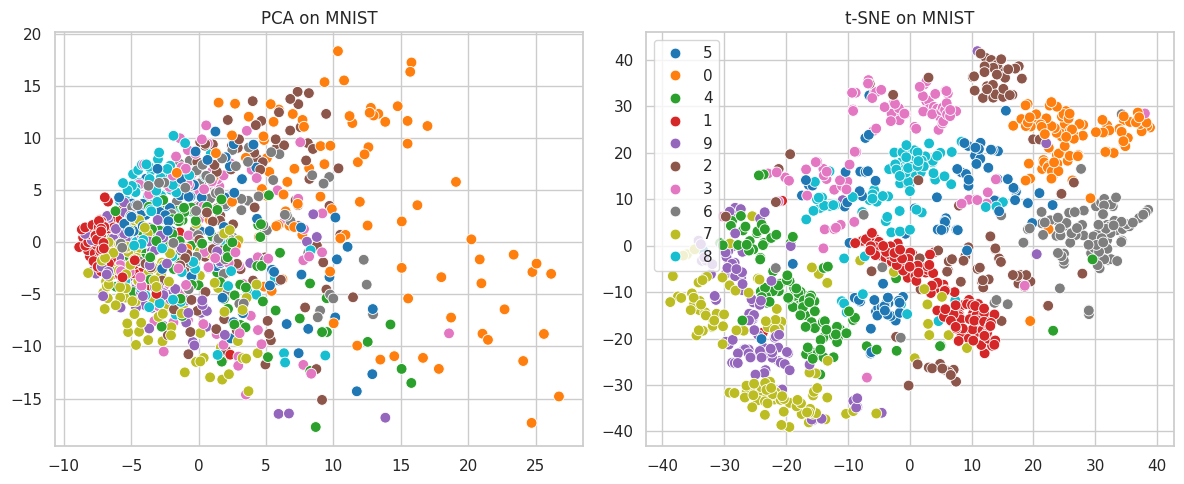

In [12]:
# Plot PCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', s=60, legend=False)
plt.title("PCA on MNIST")

# Plot t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10', s=60, legend='full')
plt.title("t-SNE on MNIST")
plt.tight_layout()
plt.show()

##Learning Curves

Example:Preparing for a test, 3 problems initially, 50 problems then when you solve 100 problems it's difficult to memorize. So you will get concept and try to do better on unseen problems hence you start generalizing better.

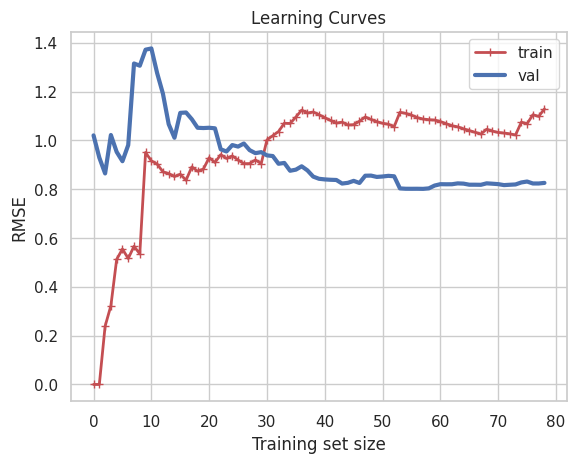

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title("Learning Curves")
    plt.show()

# Example usage with a simple Linear Regression model and dummy data
# Note: Replace with your actual model and data when using this function
X_dummy = np.random.rand(100, 1)
y_dummy = 2 * X_dummy + np.random.randn(100, 1)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_dummy, y_dummy)

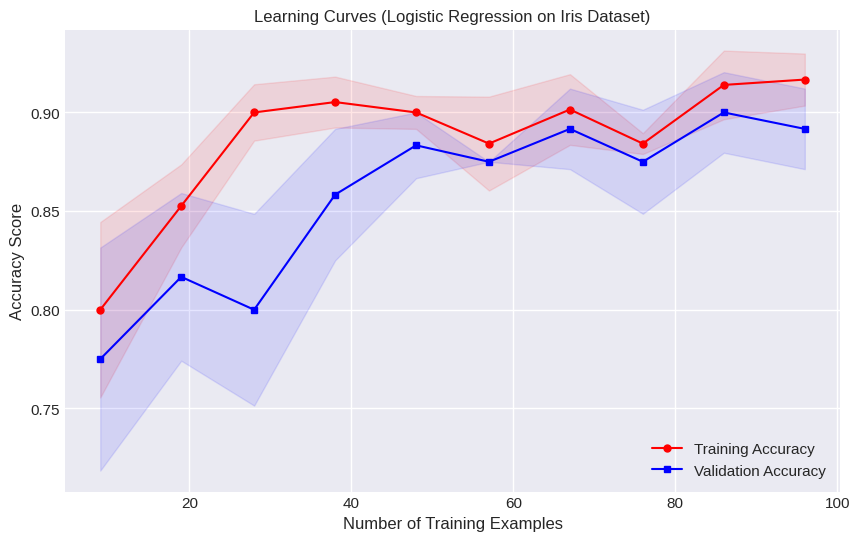

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1. Load the Iris Dataset
# The Iris dataset is a classic for classification, containing measurements
# of iris flowers and their corresponding species.
iris = load_iris()
X, y = iris.data, iris.target

# 2. Split the data into training and testing sets
# We'll reserve a portion of the data (e.g., 20%) for final evaluation,
# and use the remaining 80% for generating the learning curves.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Define the model pipeline
# We'll use a Logistic Regression model. It's good practice to scale features
# before applying models like Logistic Regression, so we'll use a pipeline
# that first scales the data and then applies the model.
model = Pipeline([
    ('scaler', StandardScaler()), # Standardize features by removing the mean and scaling to unit variance
    ('log_reg', LogisticRegression(max_iter=200, solver='liblinear', random_state=42)) # Logistic Regression classifier
])

# 4. Generate Learning Curve Data
# The learning_curve function from scikit-learn is designed for this.
# It calculates scores for different training set sizes using cross-validation.
# - estimator: The model to evaluate.
# - X, y: The training data.
# - cv: Number of folds for cross-validation (e.g., 5-fold CV).
# - n_jobs: Number of CPU cores to use (-1 means use all available cores).
# - train_sizes: The proportions of the training set to use for learning.
# - scoring: The metric to evaluate (e.g., 'accuracy' for classification).
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1,            # Use all available CPU cores
    train_sizes=np.linspace(0.1, 1.0, 10), # Use 10 different training set sizes from 10% to 100%
    scoring='accuracy'    # Use accuracy as the performance metric
)

# 5. Calculate Mean and Standard Deviation of Scores
# For each training size, learning_curve returns scores from each CV fold.
# We take the mean and standard deviation to get a more robust measure.
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# 6. Plot the Learning Curves
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid') # Using a nice style for the plot

# Plot training accuracy
plt.plot(train_sizes, train_scores_mean, color='red', marker='o', markersize=5,
         label="Training Accuracy")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="red")

# Plot validation accuracy
plt.plot(train_sizes, val_scores_mean, color='blue', marker='s', markersize=5,
         label="Validation Accuracy")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="blue")

# Add plot labels and title
plt.title("Learning Curves (Logistic Regression on Iris Dataset)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()


Cross-Validation

 The Problem with a Simple Train/Test Split

cross validation solve the issue by using Section 1 as your testing, and the remaining 4 sections (2, 3, 4, 5) as trainingl. You train your model on sections 2-5 and test it on Section 1. You get a score.

Similarly in next fold you test on 2 and train remaining

In [21]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1. Load the Iris Dataset
# The Iris dataset is a classic for classification.
iris = load_iris()
X, y = iris.data, iris.target

# 2. Define the model pipeline
# We'll use a Logistic Regression model, preceded by a StandardScaler for feature scaling.
model = Pipeline([
    ('scaler', StandardScaler()), # Standardize features
    ('log_reg', LogisticRegression(max_iter=200, solver='liblinear', random_state=42)) # Logistic Regression
])


# When cv is an integer for a classifier, cross_val_score automatically uses StratifiedKFold.
# However, for explicit KFold, you can pass a KFold object.
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Shuffle ensures random distribution of data
kfold_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print(f"Scores for each fold (K-Fold): {kfold_scores}")
print(f"Mean accuracy (K-Fold): {np.mean(kfold_scores):.4f}")
print(f"Standard deviation (K-Fold): {np.std(kfold_scores):.4f}")








Scores for each fold (K-Fold): [0.96666667 0.83333333 0.9        0.9        0.93333333]
Mean accuracy (K-Fold): 0.9067
Standard deviation (K-Fold): 0.0442


"Stratified" means layered or grouped. When performing stratified K-fold, the data is split in such a way that each fold has approximately the same percentage of samples of each target class as the complete set.

Example for Iris Dataset: The Iris dataset has three species (classes). If we use stratified K-fold, each of our K folds will have roughly the same proportion of Setosa, Versicolor, and Virginica flowers as the original dataset.

In [20]:
# For classification tasks, it's generally recommended to use StratifiedKFold.
# If you pass an integer to `cv` for a classifier, `cross_val_score` uses StratifiedKFold by default.
# We explicitly create a StratifiedKFold object here for clarity.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stratified_kfold_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

print(f"Scores for each fold (Stratified K-Fold): {stratified_kfold_scores}")
print(f"Mean accuracy (Stratified K-Fold): {np.mean(stratified_kfold_scores):.4f}")
print(f"Standard deviation (Stratified K-Fold): {np.std(stratified_kfold_scores):.4f}")

Scores for each fold (Stratified K-Fold): [0.93333333 0.96666667 0.8        0.93333333 0.86666667]
Mean accuracy (Stratified K-Fold): 0.9000
Standard deviation (Stratified K-Fold): 0.0596


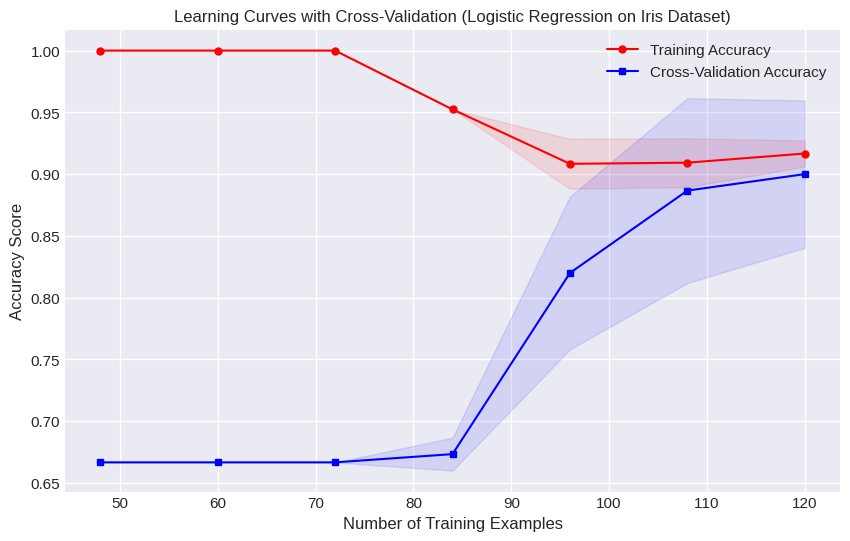

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1. Load the Iris Dataset
# The Iris dataset is a classic for classification, containing measurements
# of iris flowers and their corresponding species.
iris = load_iris()
X, y = iris.data, iris.target

# 2. Define the model pipeline
# We'll use a Logistic Regression model. It's good practice to scale features
# before applying models like Logistic Regression, so we'll use a pipeline
# that first scales the data and then applies the model.
model = Pipeline([
    ('scaler', StandardScaler()), # Standardize features by removing the mean and scaling to unit variance
    ('log_reg', LogisticRegression(max_iter=200, solver='liblinear', random_state=42)) # Logistic Regression classifier
])

# 3. Define the Cross-Validation Strategy
# We'll use StratifiedKFold, which is recommended for classification tasks
# to ensure each fold has a representative proportion of each class.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Generate Learning Curve Data using cross-validation
# The learning_curve function performs cross-validation internally for each
# specified training set size.
# - estimator: The model to evaluate.
# - X, y: The full dataset (learning_curve will split it internally for training/validation).
# - cv: The cross-validation splitting strategy (e.g., StratifiedKFold).
# - n_jobs: Number of CPU cores to use (-1 means use all available cores).
# - train_sizes: The proportions of the training set to use for learning.
# - scoring: The metric to evaluate (e.g., 'accuracy' for classification).
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X, # Use the full dataset here, learning_curve handles splitting
    y=y,
    cv=cv_strategy,       # Use our defined StratifiedKFold strategy
    n_jobs=-1,            # Use all available CPU cores
    train_sizes=np.linspace(0.1, 1.0, 10), # Use 10 different training set sizes from 10% to 100%
    scoring='accuracy'    # Use accuracy as the performance metric
)

# 5. Calculate Mean and Standard Deviation of Scores for plotting
# For each training size, learning_curve returns scores from each CV fold.
# We take the mean and standard deviation to get a more robust measure.
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# 6. Plot the Learning Curves
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid') # Using a nice style for the plot

# Plot training accuracy
plt.plot(train_sizes, train_scores_mean, color='red', marker='o', markersize=5,
         label="Training Accuracy")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="red")

# Plot validation accuracy
plt.plot(train_sizes, val_scores_mean, color='blue', marker='s', markersize=5,
         label="Cross-Validation Accuracy") # Renamed for clarity to reflect CV
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="blue")

# Add plot labels and title
plt.title("Learning Curves with Cross-Validation (Logistic Regression on Iris Dataset)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

